# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [8]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

!python -m pip install jupyter-console==6.6.3 jupyter-client>=7.0.0 ipykernel>=6.14 prompt-toolkit>=3.0.30 --no-cache --upgrade --force-reinstall


### Important: Restart the Kernel at this moment

In [1]:
# Restart the Kernel before you execute this command.
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 64.2 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 51.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 67.6 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 72.7 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 63.9 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 66.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 58.9 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 70.3 MB/s eta 0:00:01


     |████████████████████████████████| 95 kB 5.6 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257179 sha256=9c73df4d4d9059036a8ec4a65b96228220f518b68da59174f029ca2d6c396036
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.16.2
    Uninstalling ipykernel-6.16.2:
      Successfully uninstalled ipykernel-6.16.2
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.13
    Uninstalling widgetsnbexten

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to the range [-1, 1]
])

# Create training set and define training dataloader
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True
)

# Create test set and define test dataloader
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=False
)


Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

### Chosen Transforms:
1. **`transforms.ToTensor()`**:
   - **Purpose**: Converts the images from a PIL Image format (or NumPy array) to a PyTorch tensor. This is necessary because PyTorch models operate on tensor inputs.
   - **Benefit**: Scales pixel values from the range [0, 255] to [0, 1], which is numerically stable for most machine learning models.

2. **`transforms.Normalize((0.5,), (0.5,))`**:
   - **Purpose**: Normalizes the pixel values to have a mean of 0 and a standard deviation of 1 after scaling. Specifically, the transformation:
     \[
     \text{Normalized Value} = \frac{\text{Original Value} - \text{Mean}}{\text{Standard Deviation}}
     \]
     Shifts the range of pixel values from [0, 1] (after `ToTensor`) to [-1, 1].
   - **Benefit**:
     - Speeds up convergence during training as normalized inputs reduce internal covariate shifts in the network.
     - Helps models train more effectively by keeping input values centered around 0.

### Why These Steps are Necessary:
- MNIST images are grayscale with pixel values ranging from 0 to 255. The model training process benefits from smaller, normalized input values. Without these transformations:
  - Large pixel values (e.g., 255) could lead to unstable gradients.
  - The model may take longer to converge or perform poorly due to numerical instability.

### Why Not Use Other Preprocessing Steps?
- MNIST is already well-prepared and straightforward:
  - The dataset contains centered and uniformly-sized images (28x28 pixels).
  - No additional steps like cropping, resizing, or augmentation are needed for this task since the focus is on digit recognition rather than handling real-world variations.

### Alternative Choices:
If handling a more complex dataset or aiming for higher generalization, other preprocessing steps like random rotations, flipping, or resizing could be justified. However, these are unnecessary for MNIST. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Feature batch shape: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])
Pixel value range: -1.0 to 1.0
0


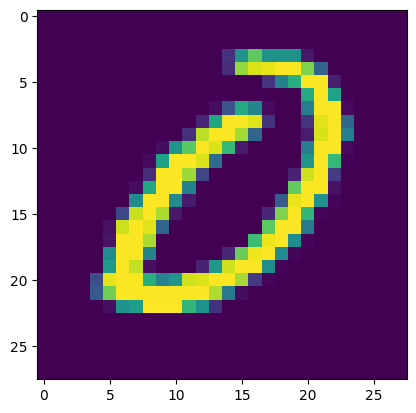

7


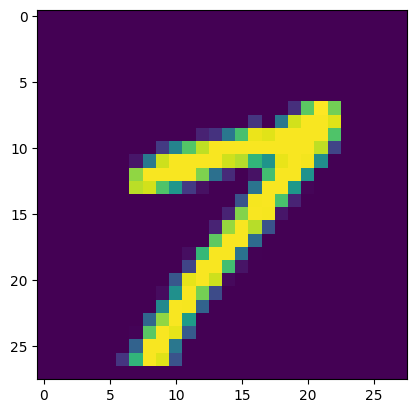

9


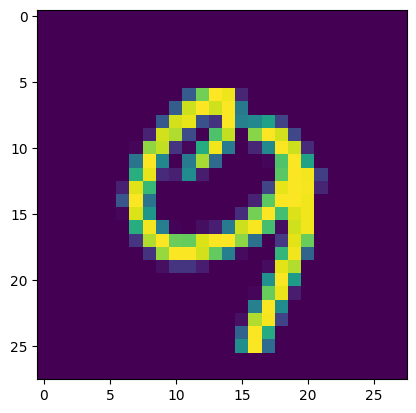

9


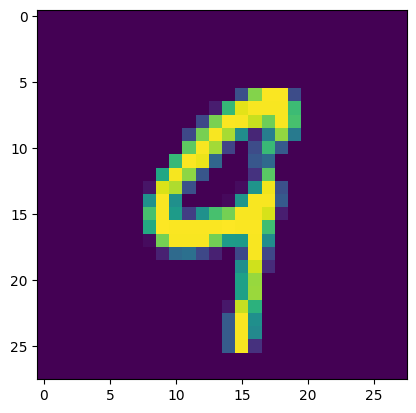

3


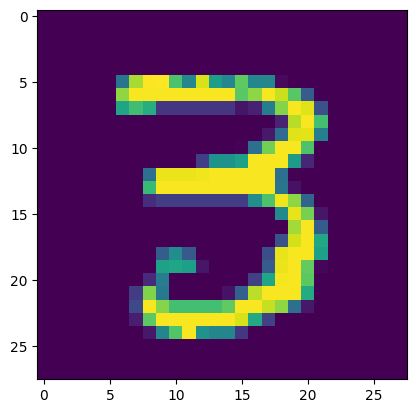

In [6]:
# Checking the shape of the training dataset
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.shape}")
print(f"Label batch shape: {train_labels.shape}")

# Checking the range of pixel values (min and max)
print(f"Pixel value range: {train_features.min()} to {train_features.max()}")

# Show 5 images and their labels
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.flatten = nn.Flatten()  # Flatten 28x28 images into a single 784-element vector
        self.fc1 = nn.Linear(28*28, 128)  # Input layer: 784 (28x28) -> Hidden layer: 128
        self.fc2 = nn.Linear(128, 64)    # Hidden layer: 128 -> Hidden layer: 64
        self.fc3 = nn.Linear(64, 10)     # Hidden layer: 64 -> Output layer: 10 (for 10 digits)
    
    def forward(self, x):
        x = self.flatten(x)         # Flatten input
        x = F.relu(self.fc1(x))     # Apply ReLU activation to the first hidden layer
        x = F.relu(self.fc2(x))     # Apply ReLU activation to the second hidden layer
        x = self.fc3(x)             # Output logits for the 10 classes
        return x

# Instantiate the model
model = MNISTNet()
print(model)


MNISTNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
# Instantiate the model
model = MNISTNet()

# Specify the loss function
# CrossEntropyLoss is commonly used for multi-class classification tasks.
# It combines log-softmax and negative log-likelihood for numerical stability.
criterion = nn.CrossEntropyLoss()

# Specify the optimizer
# Adam is a popular optimizer that adapts the learning rate for each parameter.
# It's efficient and works well for many problems, including MNIST.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print summary
print(f"Model: {model}")
print(f"Loss Function: {criterion}")
print(f"Optimizer: {optimizer}")


Model: MNISTNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Loss Function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to the selected device
model = model.to(device)

# Training parameters
num_epochs = 5
batch_size = 64
train_losses = []  # List to store average loss per epoch

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0  # Accumulate loss within an epoch

    for i, (images, labels) in enumerate(train_loader):
        # Move data to the same device as the model
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear the gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights

        # Accumulate loss
        running_loss += loss.item()

        # Print loss every 250 batches
        if (i + 1) % 250 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # Calculate and record average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {epoch_loss:.4f}")


Using device: cuda
Epoch [1/5], Step [250/938], Loss: 0.2349
Epoch [1/5], Step [500/938], Loss: 0.3450
Epoch [1/5], Step [750/938], Loss: 0.1680
Epoch [1/5], Average Loss: 0.4143
Epoch [2/5], Step [250/938], Loss: 0.1736
Epoch [2/5], Step [500/938], Loss: 0.2824
Epoch [2/5], Step [750/938], Loss: 0.1886
Epoch [2/5], Average Loss: 0.1977
Epoch [3/5], Step [250/938], Loss: 0.1062
Epoch [3/5], Step [500/938], Loss: 0.0958
Epoch [3/5], Step [750/938], Loss: 0.2348
Epoch [3/5], Average Loss: 0.1442
Epoch [4/5], Step [250/938], Loss: 0.1645
Epoch [4/5], Step [500/938], Loss: 0.0803
Epoch [4/5], Step [750/938], Loss: 0.1071
Epoch [4/5], Average Loss: 0.1129
Epoch [5/5], Step [250/938], Loss: 0.0369
Epoch [5/5], Step [500/938], Loss: 0.0255
Epoch [5/5], Step [750/938], Loss: 0.0554
Epoch [5/5], Average Loss: 0.0939


Plot the training loss (and validation loss/accuracy, if recorded).

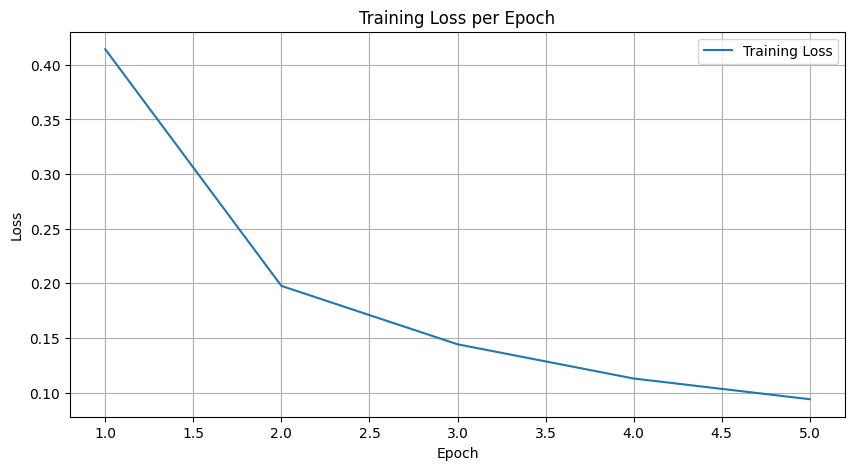

In [10]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()
plt.grid()
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

# Disable gradient computation for testing
with torch.no_grad():
    for images, labels in test_loader:
        # Move data to the same device as the model
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get predictions (index of the highest logit value)
        _, predicted = torch.max(outputs, 1)
        
        # Update correct predictions and total samples
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Compute accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 96.99%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch [1/7], Average Loss: 0.4321
Epoch [2/7], Average Loss: 0.1815
Epoch [3/7], Average Loss: 0.1322
Epoch [4/7], Average Loss: 0.1037
Epoch [5/7], Average Loss: 0.0863
Epoch [6/7], Average Loss: 0.0740
Epoch [7/7], Average Loss: 0.0659
Improved Test Accuracy: 97.08%


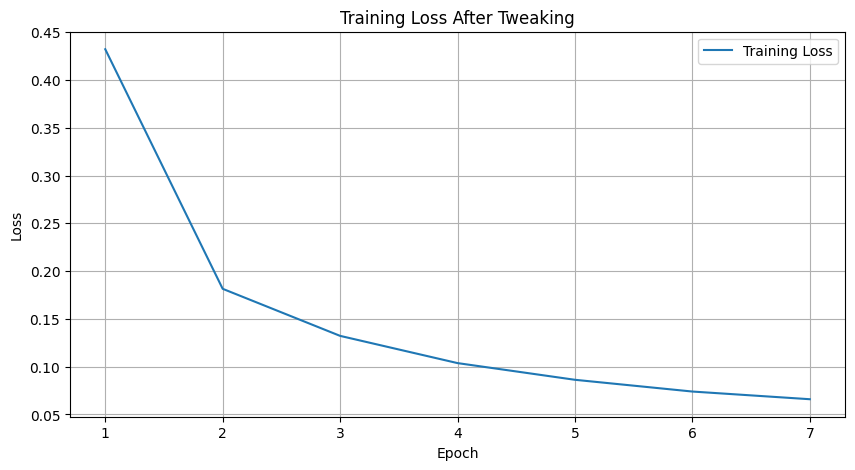

In [12]:
# Modify the model (e.g., deeper architecture)
class ImprovedMNISTNet(nn.Module):
    def __init__(self):
        super(ImprovedMNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)  # Increased neurons in the first layer
        self.fc2 = nn.Linear(256, 128)    # Added a larger second hidden layer
        self.fc3 = nn.Linear(128, 64)     # Additional hidden layer
        self.fc4 = nn.Linear(64, 10)      # Output layer remains the same

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)  # No activation on the output layer
        return x

# Instantiate the new model
model = ImprovedMNISTNet().to(device)

# Use a different optimizer and/or learning rate
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Lowered learning rate for finer updates

# Retrain the model
num_epochs = 7  # Increase epochs for better convergence
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {epoch_loss:.4f}")

# Test the updated model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"Improved Test Accuracy: {accuracy:.2f}%")

# Plot the new training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss After Tweaking")
plt.legend()
plt.grid()
plt.show()


## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
# Define the path where the model will be saved
model_save_path = "mnist_model.pth"

# Save the trained model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to mnist_model.pth
